C:\Users\Átila\AppData\Local\Temp\ipykernel_14896\350814346.py:42: DeprecationWarning: Using factorial() with floats is deprecated
  a3b=math.factorial((a3a))


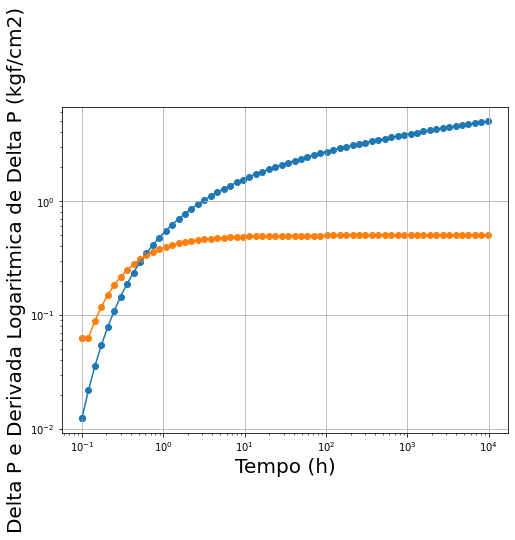

In [4]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from numpy import log as ln
import scipy.special as sc

tDi = 0.1
tDf = 10000

n = 1
tD = np.zeros(65)
pD = np.zeros(65)
tD[0] = tDi

while tDi <= tDf:
    pD[n]=CALCULA_PD(tDi)
    tD[n]=tDi
    tDi=tDi*1.2
    n=n+1

PDLinha = np.zeros(65)
for np in range(2, n-1):
    PDLinha[np]=DerivLog(tD[np-1],pD[np-1],tD[np],pD[np],tD[np+1],pD[np+1])

PDLinha[1]=PDLinha[2]
PDLinha[0]=PDLinha[1]
PDLinha[n-1]=PDLinha[n-2]
pD[0] = pD[1]

fig = plt.figure(figsize=(8,6))
plt.scatter(tD,pD)
plt.plot(tD,pD)
plt.scatter(tD,PDLinha)
plt.plot(tD,PDLinha)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tempo (h)", fontsize=20)
plt.ylabel("Delta P e Derivada Logaritmica de Delta P (kgf/cm2)", fontsize=20)
plt.show()

In [3]:
# ====================================================
def DerivLog(x1,y1,xc,yc,x2,y2):
    d1=((y2-yc)/ln(x2/xc))*(ln(xc/x1)/ln(x2/x1))
    d2=((yc-y1)/ln(xc/x1))*(ln(x2/xc)/ln(x2/x1))
    return (d1+d2)

# ====================================================
#Solução da Linha-Fonte
# ====================================================
def FT_LINHAFONTE(u):
    return sc.kn(0,1*math.sqrt(u))/u;
    #return sc.kn(0,1*math.sqrt(u))/(u**(3/2)*sc.kn(1,math.sqrt(u)))

# ====================================================
def minimo(i1, i2):
# ====================================================
    if i1 < i2:
        return i1
    else:
        return i2

# ====================================================
def CALCULA_PD(td):
#Rotina para inversão numérica de uma função no espaço de Laplace pelo algoritimo de Stehfest
# ===================================================
    NP_STEHFEST=12;
    n=NP_STEHFEST;

    v = np.zeros(65)
    for i in range(1, n+1):
        somat = 0
        inis = math.floor((i + 1)/2)
        fins = minimo(i,math.floor(n/2))
        a0=(-1)**(i+(n/2))
    #   disp([i,inis,fins])

        for k in range(inis, fins+1):
            a1=k**(1+(n/2))
            a2a=2*k
            a2b=math.factorial((a2a))
            a3a=((n/2)-k)
            a3b=math.factorial((a3a))
            a4a=math.factorial(k)
            a4b=a4a**2
            a5a=i-k
            a5b=math.factorial((a5a))
            a6a=((2*k)-i)
            a6b=math.factorial((a6a))
            somat=somat+(((a1*a2b)/(a3b*a4b*a5b*a6b)))
        v[i] = a0 * somat
    st = 0
    for m in range(1, NP_STEHFEST+1):
        u = m * ln(2.0) / td
    #=================================    
    # AQUI ENTRA A FUNÇÃO QUE EU QUERO    
    #================================
        st = st + v[m] * FT_LINHAFONTE(u)
    return ln(2.0) * st / td

In [7]:
#Achando as valores das constantes
import numpy as np
import math 
import matplotlib.pyplot as plt
from numpy import log as ln
import scipy.special as sc

NP_STEHFEST=12;
def alg():
    for m in range(1, NP_STEHFEST+1):
        for i in range(len(tD)):
            u = m * ln(2.0) / tD[i]
            A = np.array([[sc.kv(0,10000*math.sqrt(u)), sc.iv(0, 10000*math.sqrt(u))], [sc.kn(1,math.sqrt(u)), (-1)*sc.iv(1, math.sqrt(u))]])
            #print(A)
            B = np.array([0,1/(u**(3/2))]) 
            A_inversa = np.linalg.inv(A)
            X = np.dot(A_inversa,B)
            print(X)
    return X

def Pressao(u):
    [a,b] = alg()
    return a*sc.kv(0, 10000*math.sqrt(u)) + b*sc.iv(0, 10000*math.sqrt(u))

x = np.linspace(-50,50)
#print(Pressao(u))

plt.plot(u, Pressao(u), 'o')
plt.show()

[0.8739392 0.       ]
[0.8739392 0.       ]
[0.86401398 0.        ]
[0.87084528 0.        ]
[0.89324826 0.        ]
[0.93091664 0.        ]
[0.98426923 0.        ]
[1.05437245 0.        ]
[1.14291664 0.        ]
[1.25223347 0.        ]
[1.38534795 0.        ]
[1.54606216 0.        ]
[1.73907055 0.        ]
[1.97010895 0.        ]
[2.24614092 0.        ]
[2.5755869 0.       ]
[2.96860334 0.        ]
[3.43742059 0.        ]
[3.99675076 0.        ]
[4.66427878 0.        ]
[5.46125303 0.        ]
[6.41319511 0.        ]
[7.55075221 0.        ]
[8.9107206 0.       ]
[10.53727423  0.        ]
[12.48343931  0.        ]
[14.81286403  0.        ]
[17.60194236  0.        ]
[20.9423627  0.       ]
[24.94416633  0.        ]
[29.73941753  0.        ]
[35.48660773  0.        ]
[42.3759405  0.       ]
[50.63567344  0.        ]
[60.53972855  0.        ]
[72.4168245  0.       ]
[86.6614354  0.       ]
[103.74694134   0.        ]
[124.24140892   0.        ]
[148.826528   0.      ]
[178.32033564   0.    

[1.63421195 0.        ]
[1.36446423 0.        ]
[1.17925663 0.        ]
[1.05174064 0.        ]
[0.96525062 0.        ]
[0.90925306 0.        ]
[0.87704313 0.        ]
[0.86439985 0.        ]
[0.86878493 0.        ]
[0.88886011 0.        ]
[0.92419773 0.        ]
[0.97511293 0.        ]
[1.04257637 0.        ]
[1.12818334 0.        ]
[1.23416548 0.        ]
[1.36343777 0.        ]
[1.51967754 0.        ]
[1.70743486 0.        ]
[1.93227622 0.        ]
[2.2009649 0.       ]
[2.52168324 0.        ]
[2.90430356 0.        ]
[3.36071656 0.        ]
[3.90522766 0.        ]
[4.55503449 0.        ]
[5.33080121 0.        ]
[6.25734872 0.        ]
[7.36448367 0.        ]
[8.68799395 0.        ]
[10.27084357  0.        ]
[12.16460695  0.        ]
[14.43119024  0.        ]
[17.14489705  0.        ]
[20.39490741  0.        ]
[24.28825263  0.        ]
[28.95338508  0.        ]
[34.544462  0.      ]
[41.24648595  0.        ]
[49.28147347  0.        ]
[58.91585728  0.        ]
[70.46936905  0.        

TypeError: only size-1 arrays can be converted to Python scalars

1.661385592049322
0.0
1.2384089374562648
0.0
1.0597488753645656
0.0
0.9668624268319115
0.0
0.9145912804849807
0.0
0.8850728840646573
0.0
0.8697991840546596
0.0
0.8641964045766695
0.0
0.8655870735616417
0.0
0.8723019812597785
0.0
0.883249424108955
0.0
0.89768843274125
0.0
0.915101399978885
0.0
0.9351186755719294
0.0
0.9574719358269101
0.0
0.9819642677120597
0.0
1.008450363700481
0.0
1.0368230493792203
0.0
1.0670038992882385
0.0
1.0989365629085184
0.0
1.1325819298837136
0.0
1.1679145697941253
0.0
1.2049200718877802
0.0
1.2435930311138788
0.0
1.2839355054805854
0.0
1.3259558219812542
0.0
1.3696676436359387
0.0
1.4150892344620498
0.0
1.4622428761267743
0.0
1.5111544020253505
0.0
1.561852823129835
0.0
1.6143700261962801
0.0
1.6687405295017188
0.0
1.7250012846823914
0.0
1.7831915157918043
0.0
1.8433525886227475
0.0
1.9055279048057212
0.0
1.9697628163248238
0.0
2.0361045569663876
0.0
2.104602187897586
0.0
2.1753065551078774
0.0
2.248270256869603
0.0
2.3235476197107503
0.0
2.4011946816623175
0

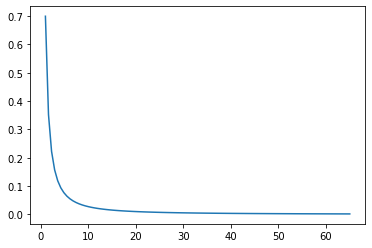

In [6]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.special as sc

def SolveAB(u):
    M = [[sc.kv(0,10000*math.sqrt(u)), sc.iv(0, 10000*math.sqrt(u))],
         [(-1)*sc.kv(1,math.sqrt(u)), sc.iv(1, math.sqrt(u))]]
    b = [0, -1/(u**(3/2))]
    Minv = np.linalg.inv(M)
    ab = np.dot(Minv,b)
    return ab

def Press(A, B, u):
    print(A)
    print(B)
    return A*sc.kv(0, 1*math.sqrt(u)) + B*sc.iv(0, 1*math.sqrt(u))

u = np.linspace(1,65, num = 100)
pressao = np.zeros(100)

for i in range(100):
    [A, B] = SolveAB(u[i])
    pressao[i] = Press(A, B, u[i])
    
plt.plot(u, pressao)
plt.show()